In [16]:
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader.data as web 
import warnings
import numpy as np

Unexpected exception formatting exception. Falling back to standard exception
Traceback (most recent call last):
  File "/root/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_69/1086773775.py", line 3, in <module>
    import matplotlib
  File "/root/venv/lib/python3.11/site-packages/matplotlib/__init__.py", line 977, in <module>
    dict.update(rcParams, _rc_params_in_file(matplotlib_fname()))
                                             ^^^^^^^^^^^^^^^^^^
  File "/root/venv/lib/python3.11/site-packages/matplotlib/__init__.py", line None, in matplotlib_fname
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2201, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^

In [4]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    # DISTRIBUTIONS = [        
    #     st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    #     st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    #     st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    #     st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    #     st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    #     st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    #     st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    #     st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    #     st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    #     st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    # ]

   # Distributions to check
    # DISTRIBUTIONS = [  st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    #      st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    #     st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    #      st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    #      st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    #      st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    #      st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    #      st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    #      st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    #      st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy]
    
    #DISTRIBUTIONS = [st.gennorm,st.genexpon,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
     #   st.nct,st.norm,st.powerlognorm, st.uniform, st.poisson     ]
    DISTRIBUTIONS = [st.norm, st.uniform, st.poisson,st.expon  ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)


In [7]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


In [10]:
# Load data from statsmodels datasets
path = '/work/finanzas_cuantitativas/data/raw/01_Data_OilCompany.csv'
RawData = pd.read_csv(path)
#RawData = pd.read_csv('Data_OilCompany10records.csv')

NameError: name 'pd' is not defined

In [37]:
RawData

,Year 1,Year 2,Year 3,Year 4,Year 5
0,203726.0,279969.0,465303.0,200445.0,96319.0
1,263845.0,272439.0,2192.0,199901.0,0.0
2,27726.0,334861.0,82265.0,199954.0,64958.0
3,293801.0,210117.0,275087.0,199934.0,0.0
4,297319.0,242569.0,464097.0,200598.0,141285.0
...,...,...,...,...,...
1995,237561.0,270469.0,115291.0,199807.0,61051.0
1996,216529.0,261005.0,86027.0,200510.0,0.0
1997,250277.0,220901.0,481138.0,199800.0,2573.0
1998,251051.0,248136.0,380400.0,200100.0,124209.0


Text(0, 0.5, 'Frequency')

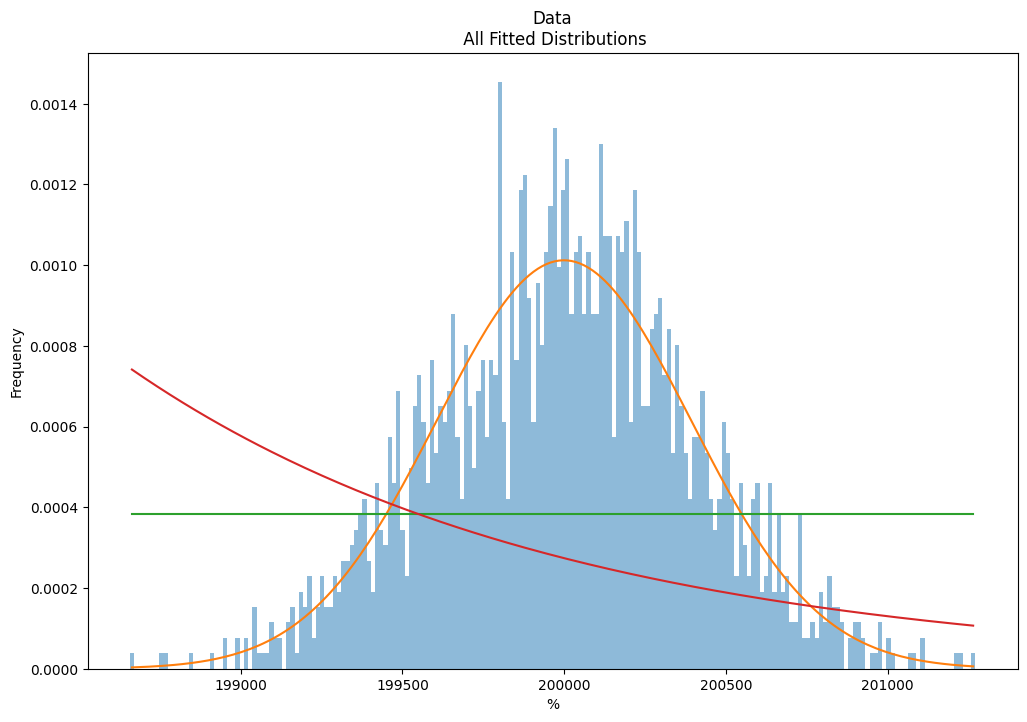

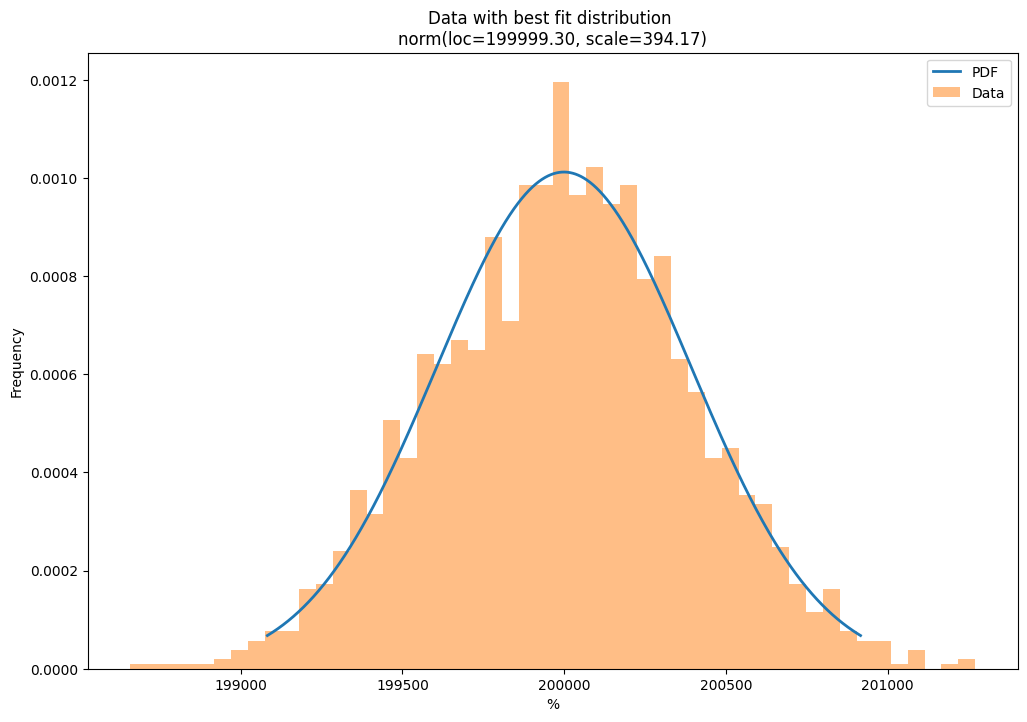

In [46]:
#data=RawData

#Index(['  Year 1  ', '  Year 2  ', '  Year 3  ', '  Year 4  ', '  Year 5  '], dtype='object')

#Test Year 2
data=RawData.iloc[:,3]
#data=float(data.replace("-",0))

#data=pd.DataFrame(b[:,7])


#%%
# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=200, density=True, alpha=0.5)

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Data\n All Fitted Distributions')
ax.set_xlabel(u'%')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Data with best fit distribution \n' + dist_str)
ax.set_xlabel(u'%')
ax.set_ylabel('Frequency')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1804d27-959b-4770-9ff8-7af629ca870f' target="_blank">

Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>